### Import the neccessay libs

In [188]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection, preprocessing, feature_extraction, metrics, base, pipeline
from joblib import dump, load
import PIL
import pytesseract

### load the data

In [189]:
df = pd.read_csv("combined_data.csv")
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [190]:
df.head() # display the first 5 datas

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [191]:
df.tail() # display the last 5 datas

,label,text
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [192]:
df.shape # find the size of the data

(83448, 2)

In [193]:
df.info() # infomation about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [194]:
print(df) # print the data

       label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
83443      0  hi given a date how do i get the last date of ...
83444      1  now you can order software on cd or download i...
83445      1  dear valued member canadianpharmacy provides a...
83446      0  subscribe change profile contact us long term ...
83447      1  get the most out of life ! viagra has helped m...

[83448 rows x 2 columns]


In [195]:
labels = {0 : "not spam", 1 : "spam"}
label_counts = df['label'].value_counts()
print(labels)
print(label_counts)

{0: 'not spam', 1: 'spam'}
1    43910
0    39538
Name: label, dtype: int64


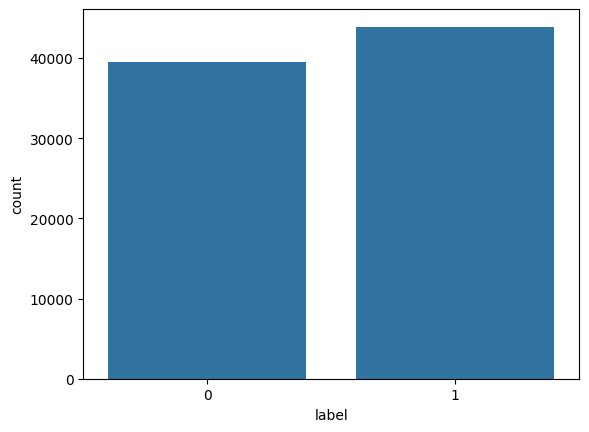

In [196]:
sns.countplot(x = 'label', data = df)
plt.show()

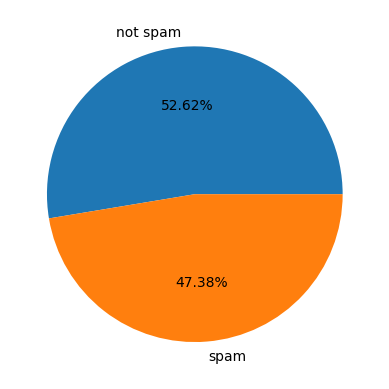

In [197]:
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [198]:
df.groupby(df['label']).describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

### start the data preprocessing and preparation section

In [199]:
# checking for the null values

df.isna().sum()
#df.isna()

label    0
text     0
dtype: int64

In [200]:
#  handling the duplicates
print(f"number of ducplicated urls : {np.sum(df.duplicated())}")
df.drop_duplicates(inplace = True)
print(f"no. of duplicated urls (after dropping duplicates) : {np.sum(df.duplicated())}")

number of ducplicated urls : 0
no. of duplicated urls (after dropping duplicates) : 0


In [201]:
# size of the data
print(df.shape)

(83448, 2)


In [202]:
label_counts = df['label'].value_counts()
print(label_counts)

1    43910
0    39538
Name: label, dtype: int64


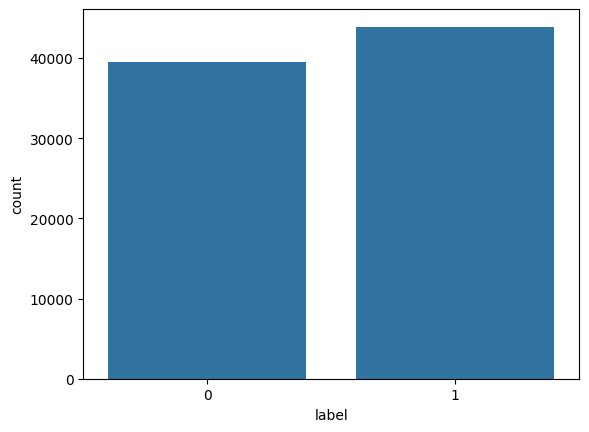

In [203]:
sns.countplot(x = 'label', data = df)
plt.show()

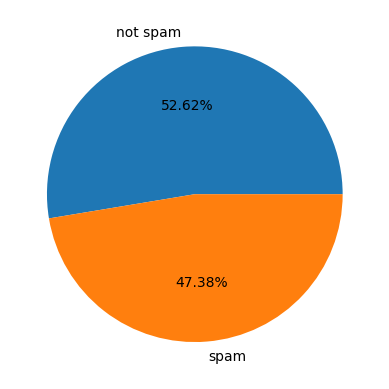

In [204]:
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

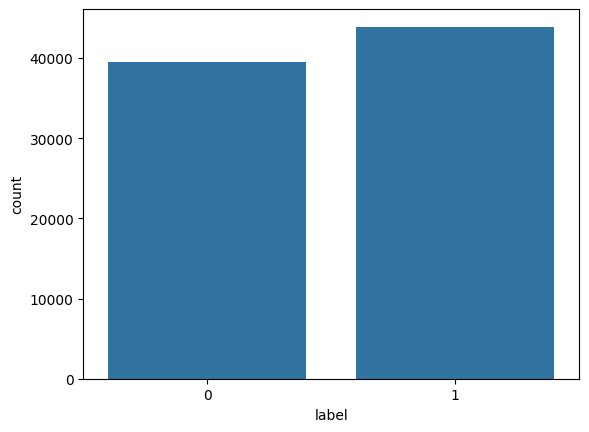

In [205]:
sns.countplot(x = 'label', data = df)
plt.show()

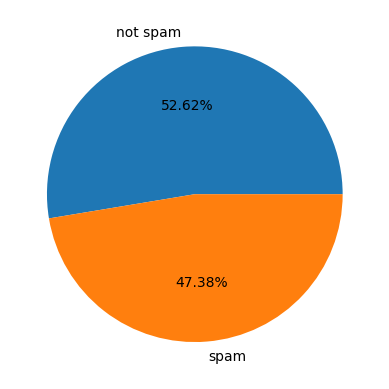

In [206]:
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [207]:

X = df.drop('label', axis = 1).values
y= df['label'].values
print(X.shape, y.shape)

(83448, 1) (83448,)


In [208]:
print(X)

[['ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage']
 ["wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumber"]
 [" computer connection from cnn

In [209]:
# Count Vectorization ( Converting text into features ) -> 
# Count of each word in the url


# from sklearn import feature_extraction


vectorizer = feature_extraction.text.CountVectorizer()

In [210]:
X = vectorizer.fit_transform(X.reshape(-1))
# leave X as sparse matrix, dont cinvert it to dense matrix ) memory limilations)
print("total no of features :", len(vectorizer.get_feature_names_out()))


total no of features : 310813


In [211]:
print(X.shape)

(83448, 310813)


In [212]:
# splitting the data into training and testing data ->
# stratification

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.15, stratify = y)
print(X_train.shape, X_test.shape)

(70930, 310813) (12518, 310813)


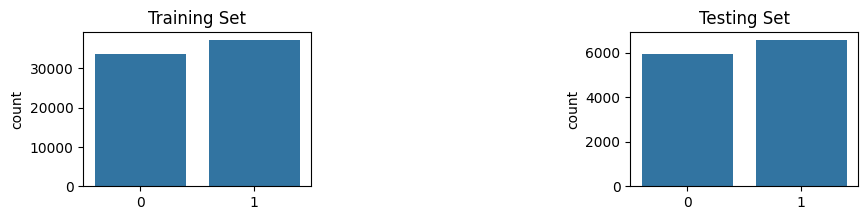

In [213]:
# checking whether the labels are distributed uniformely

plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test)
plt.show()

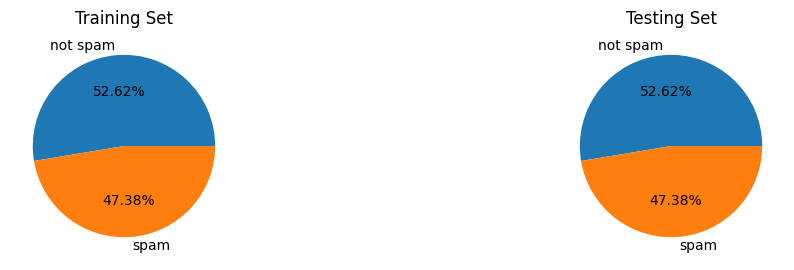

In [214]:
# Checking whether the labels are distributed uniformely

plt.figure(figsize = (10, 3))

plt.subplot(1, 3, 1)
plt.title("Training Set")
plt.pie(pd.Series(y_test).value_counts(), labels = labels.values(), autopct = "%.2f%%")

plt.subplot(1, 3, 3)
plt.title("Testing Set")
plt.pie(pd.Series(y_test).value_counts(), labels = labels.values(), autopct = "%.2f%%")
plt.show()

# model building and training

#### cross validation (selecting the best model)

In [215]:
log_reg = linear_model.LogisticRegression(max_iter = 1000)
svc = svm.LinearSVC()
nb = naive_bayes.MultinomialNB()
desc_tree = tree.DecisionTreeClassifier()
rf = ensemble.RandomForestClassifier()

models = [nb]
scores = []

def evaluate(model):
    cross_val_scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv = 5)
    print(f"\nCross Validation Scores for model {model} : ")
    print(cross_val_scores, cross_val_scores.mean())
    scores.append(cross_val_scores.mean())
    
for model in models:
    evaluate(model)


Cross Validation Scores for model MultinomialNB() : 
[0.97596222 0.9761032  0.97511631 0.97568025 0.9752573 ] 0.9756238545044411


In [216]:
# training the model

model = models[np.argmax(scores)]
print(f"Best model : {model}")
model.fit(X_train, y_train)

Best model : MultinomialNB()


MultinomialNB()

In [217]:
# making the predictions

y_train_pred = model.predict(X_train)

In [218]:
# evaluating the performance on train set

accuracy = np.sum(y_train == y_train_pred) / len(y_train)
print("Accuracy (train) : ", accuracy)

Accuracy (train) :  0.9823769913999718


In [219]:
# confusion matrix

cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[33196   411]
 [  839 36484]]


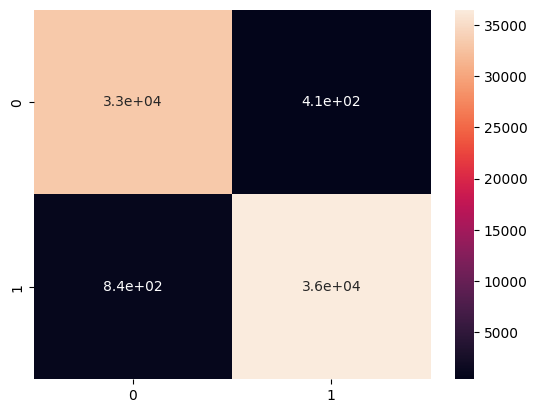

In [220]:
sns.heatmap(cm, annot = True)
plt.show()

In [221]:
# classification report
clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     33607
           1       0.99      0.98      0.98     37323

    accuracy                           0.98     70930
   macro avg       0.98      0.98      0.98     70930
weighted avg       0.98      0.98      0.98     70930



# model validation

In [222]:
y_test_pred = model.predict(X_test)
print(y_test[:10], y_test_pred[:10])

[1 1 1 1 0 0 0 0 1 0] [1 1 1 1 0 0 0 0 1 0]


In [223]:
# evaluating the performance on test set

accuracy = np.sum(y_test == y_test_pred) / len(y_test)
print("accuracy (test) : ", accuracy)

accuracy (test) :  0.9741971560952228


In [224]:
# confusion matrix

cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[5806  125]
 [ 198 6389]]


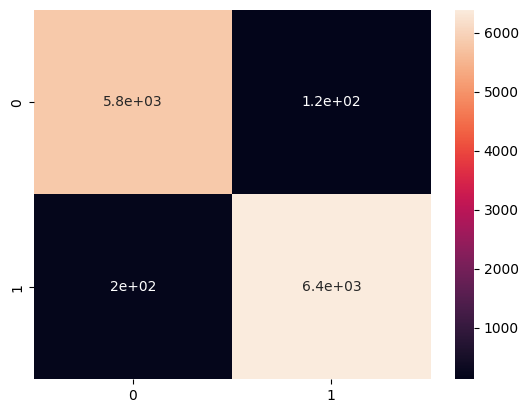

In [225]:
sns.heatmap(cm, annot = True)
plt.show()

In [226]:
# classification report
clf_report = metrics.classification_report(y_test, y_test_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5931
           1       0.98      0.97      0.98      6587

    accuracy                           0.97     12518
   macro avg       0.97      0.97      0.97     12518
weighted avg       0.97      0.97      0.97     12518



In [227]:
dump(model, "clf_model.h5")

['clf_model.h5']

In [228]:
saved_model = load("clf_model.h5")


In [242]:
inp = np.array(["loading the model and making predictions",
       "you won a lottery !", "Nothing is permanant",
        "hello, want a job ?",
        "Hello, this is hemant kumar from kjc.",
        "to stop receiving the mail, do unsubscribe",
        ])

In [243]:
vectorizer_inp = vectorizer.transform(inp)
print(vectorizer_inp.shape)
saved_model.predict(vectorizer_inp)

(6, 310813)


array([0, 1, 1, 1, 0, 1], dtype=int64)